## Pandas Visualizations and Grid Charts
Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday. 

Each row describes the following:
The time of registering the data: the `Hour (Coded)` column.
The number of incidents that happened in São Paulo at the time of registering the data: `Immobilized bus`, `Broken Truck`, `Vehicle excess`, `Fire vehicles`, etc.
The traffic slowness at the time of registering the data: `Slowness in traffic (%)`.
The data was registered from 7:00 to 20:00 every 30 minutes. The `Hour (Coded)` column has values from `1` to `27`:

- `1` corresponds to 7:00.
- `2` corresponds to 7:30.
- ...
- `26` corresponds to 19:30.
- `27` corresponds to 20:00.
Researchers Ricardo Pinto Ferreira, Andréa Martiniano, and Renato Jose Sassi collected the dataset. You can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil).

### 2. Traffic Behavior Dataset
Perform a quick examination of the dataset.
- Inspect the first and the last five rows.
- Use `DataFrame.info()` to print summary information about the dataset.  
- Do you see any missing values? Are all data types numerical?  
   - No null value   
   - Slowness in traffic (%) is string(object)

In [16]:
import pandas as pd
traffic=pd.read_csv(r'./traffic_sao_paulo.csv',sep=';')
traffic.info()
# No null value, Slowness in traffic (%) is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

### 3. Slowness in Traffic
1. Import `matplotlib.pyplot`, and plot a histogram for the `Slowness in traffic (%)` column — run your code without submitting the answer.
2. Based on the histogram, evaluate the truth value of the sentences below.
- The distribution of `Slowness in traffic (%)` is right skewed. Assign the Boolean `True` or `False` to `sentence_1`.
- Most of the values pile up on the left side of the histogram. Assign `True` or `False` to `sentence_2`.
- Most of the values are over 15.0%. Assign `True` or `False` to `sentence_3`.

In [17]:
traffic['Slowness in traffic (%)'].head()
# It's a string represent pecentage and seperate by ','
# We need to convert it to numerical for futher operation

0     4,1
1     6,6
2     8,7
3     9,2
4    11,1
Name: Slowness in traffic (%), dtype: object

In [18]:
traffic['Slowness in traffic (%)']=traffic['Slowness in traffic (%)'].str.replace(',','.')
traffic['Slowness in traffic (%)']=traffic['Slowness in traffic (%)'].astype(float)
traffic['Slowness in traffic (%)'].head()

0     4.1
1     6.6
2     8.7
3     9.2
4    11.1
Name: Slowness in traffic (%), dtype: float64

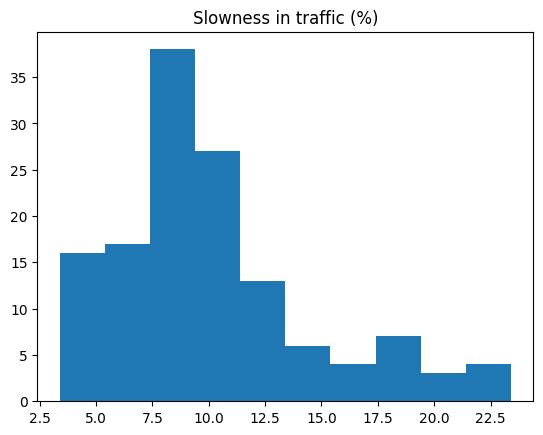

In [19]:
import matplotlib.pyplot as plt
plt.hist(traffic['Slowness in traffic (%)'])
plt.title('Slowness in traffic (%)')
plt.show()

In [20]:
# The distribution of `Slowness in traffic (%)` is right skewed.
sentence_1=True

# Most of the values pile up on the left side of the histogram. 
sentence_2=True

# Most of the values are over 15.0%.
sentence_3=False

### 4. Pandas Visualization Methods
1. Use the `Series.plot.hist()` method to generate a histogram for the `Slowness in traffic (%)` column.
2. Add the title Distribution of `Slowness in traffic (%)` (the answer checking is case-sensitive).
3. Add the x-label `Slowness in traffic (%)`.
4. Display the plot using `plt.show()`.

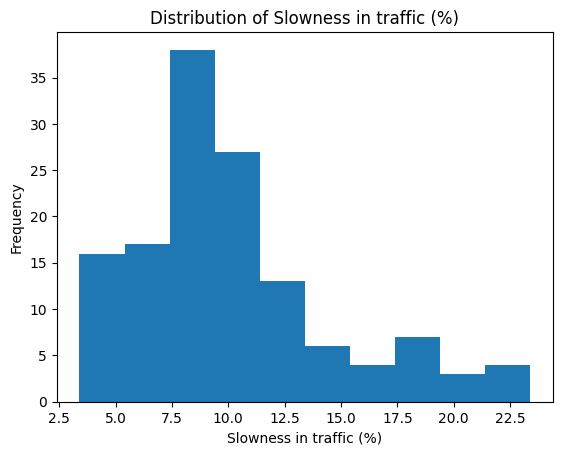

In [21]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

### 5. Frequency of Incidents
1. Generate a horizontal bar plot for the `incidents.sum()` table. Run your code without submitting the answer.
2. Based on the resulting bar plot, evaluate the truth value of the following sentences:
- Broken trucks are the most frequent cause of slow traffic. Assign the Boolean `True` or `False` to `sentence_1`.
- Lack of electricity and flooding are less frequent than broken trucks. Assign `True` or `False` to `sentence_2`.
- The most frequent incident type is broken trucks. Assign `True` or `False` to `sentence_3`

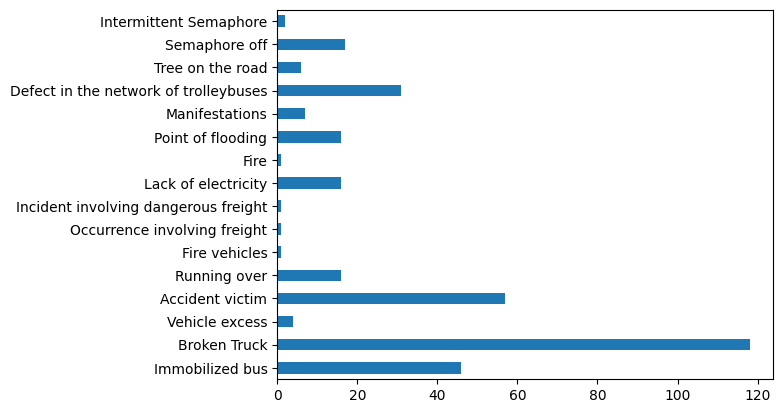

In [22]:
incidents=traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],axis=1) # axis refer to drop column
incidents.sum().plot.barh() # barh() is bar chart in horizontal
plt.show()
sentence_1=False
sentence_2=True
sentence_3=True

### 6. Correlations with Traffic Slowness
Using the `DataFrame.plot.scatter()` method:

1. Generate a scatter plot with `Slowness in traffic (%)` on the x-axis and `Point of flooding` on the y-axis. Close and display the plot using `plt.show()`.
2. Generate a scatter plot with `Slowness in traffic (%)` on the x-axis and `Semaphore off` on the y-axis.


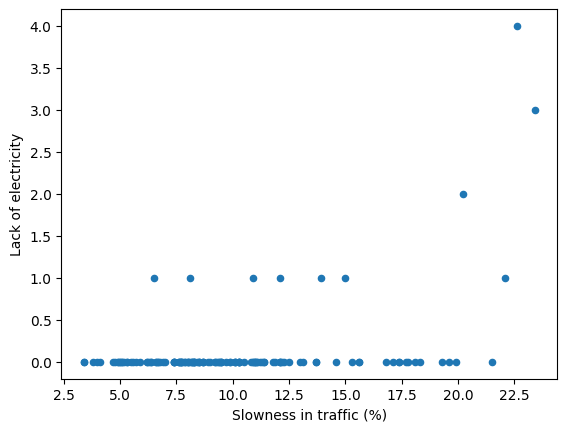

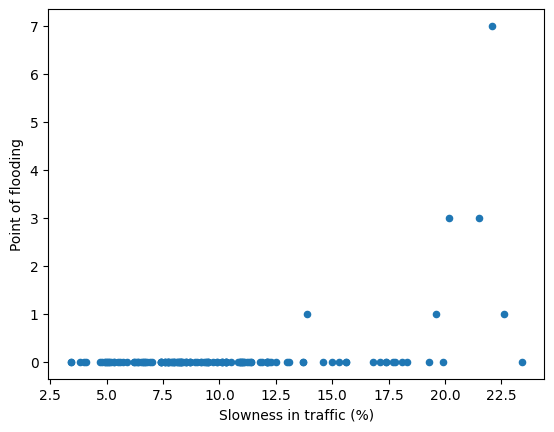

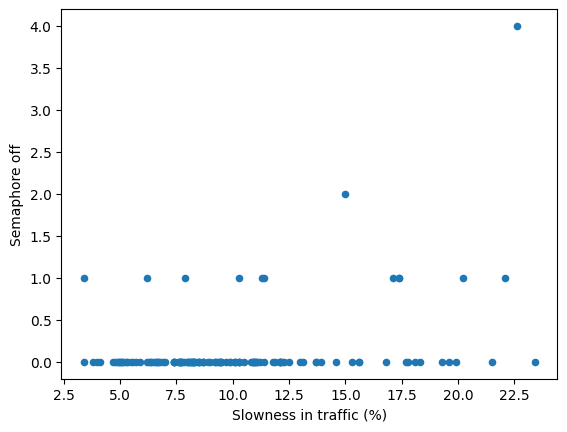

In [27]:
traffic.plot.scatter(x='Slowness in traffic (%)',y='Lack of electricity')
traffic.plot.scatter(x='Slowness in traffic (%)',y='Point of flooding')
traffic.plot.scatter(x='Slowness in traffic (%)',y='Semaphore off')
plt.show()

### 7. Traffic Slowness Over 20%

1. Isolate all the rows where traffic slowness is 20% or more. Assign the new `DataFrame` to a variable named `slowness_20_or_more`.
2. Drop the `Slowness in traffic (%)` and `Hour (Coded)` columns from `slowness_20_or_more`.
3. Calculate the event frequencies using the `DataFrame.sum()` method on `slowness_20_or_more`. Assign the resulting `Series` to `incident_frequencies`.
4. Use `incident_frequencies` to plot a horizontal bar plot — use a Pandas method.
5. Examine the plot — what are some high-frequency incidents when traffic slowness is 20% or more?